# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works.

**Assumptions**
- all features are normal distributed.
- all features are uncorrelated

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distribuited feature

             x  y
133  12.139149  1
629   6.437758  0
544  11.330208  1
916   3.651016  0
766  10.193700  1


<AxesSubplot:xlabel='x', ylabel='Count'>

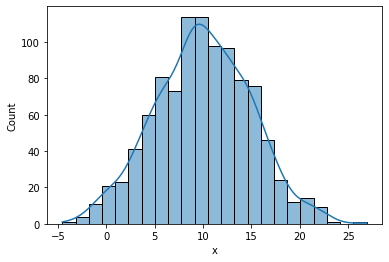

In [3]:
#feature
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#class
#fx = b0 + b1 * x1 + error
error = np.random.normal(0, 1, 1000)
fx = x + error

y = [1 if i >= mean else 0 for i in x]

#data with X an y
data = pd.DataFrame({'x':x, 'y':y})
print(data.sample(5))

sns.histplot(data=data, x='x', kde=True)

In [4]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'x']
sample_class0 = data.loc[data['y'] == 0, 'x']


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
sample_lda = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))
print(sample_lda)


#step 4: LDA classifier
pred_class1 = data['x'] * mean_class1/(sample_lda**2) - (mean_class1**2)/(2*(sample_lda**2)) + np.log(prob_class1)
pred_class0 = data['x'] * mean_class0/(sample_lda**2) - (mean_class0**2)/(2*(sample_lda**2)) + np.log(prob_class0)

13.947469506933544
6.053704948541593
0.498
0.502
8.763301730208315


In [5]:
#comparing results
data['prob_class1'] = pred_class1
data['prob_class0'] = pred_class0
data['prediction_lda'] = np.where(data['prob_class1'] > data['prob_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[502   0]
 [  7 491]]
0.993
1.0
0.9859437751004017


<AxesSubplot:xlabel='x', ylabel='prob_class1'>

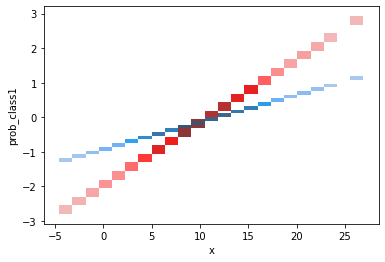

In [6]:
#graphing the probabilty
sns.histplot(data=data, x='x', y='prob_class1', kde=True, color='red')
sns.histplot(data=data, x='x', y='prob_class0', kde=True)

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 

### Cenario 2 - LDA with 3 normal distributed and uncorrelated features

            xA         xB         xC  y
314  17.322396 -10.872933  -3.239347  1
579   6.168071  -7.966652 -12.462735  1
689  15.536318 -15.823596  -1.739038  1
642   8.437507  -2.383451   8.716284  1
736  -2.368912 -11.044704   3.342691  1


<AxesSubplot:xlabel='value', ylabel='Count'>

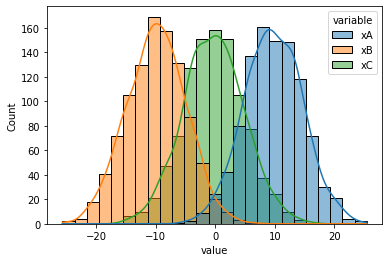

In [10]:
#feature A
meanA, stdA = 10, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = -10, 5
xB = np.random.normal(meanB, stdB, 1000)


#feature C
meanC, stdC = 0, 5
xC = np.random.normal(meanC, stdC, 1000)

#class
error = np.random.normal(0, 1, 1000)
fx = xA + xB + xC + error

y = [1 if i >= (meanA + meanB + meanC) else 0 for i in x]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC']), x='value', hue='variable', kde=True)

In [25]:
#correlation matrix
data.drop(columns='y').corr()

,xA,xB,xC
xA,1.000000,0.008745,-0.038725
xB,0.008745,1.000000,0.014587
xC,-0.038725,0.014587,1.000000


In [47]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1].drop(columns='y')
sample_class0 = data.loc[data['y'] == 0].drop(columns='y')


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
X_corr = X.corr()


#step 4: LDA classifier
pred_class1 = np.matmul(X, X_corr) * mean_class1 - 0.5 * np.matmul(mean_class1, X_corr) * mean_class1 + np.log(prob_class1)


#########ERRRO NA FX
A multiplicação de matrizes precisa ser um valor escalar. Acho que precisa transport e inverter as matrizes (pag 146)

xA    9.773698
xB   -9.926601
xC   -0.252843
dtype: float64
xA     8.807366
xB   -10.374311
xC    -1.335470
dtype: float64
0.972
0.028000000000000025


C:\Users\Kenji\AppData\Local\Temp\ipykernel_10808\1444407484.py:27: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pred_class1 = np.matmul(X.T, X_corr) * mean_class1 - 0.5 * np.matmul(mean_class1, X_corr) * mean_class1 + np.log(prob_class1)


ValueError: Dot product shape mismatch, (3, 1000) vs (3, 3)

In [46]:
pred_class1

,0,1,2,xA,xB,xC
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN


### Cenario 3 - LDA with 2 normal distributed and high correlated features

### Cenario 3 - LDA with 1 non-normal distribuited feature and 1 class 

### Cenario 4 - LDA with 1 normal distribuited feature and 1 multi-class 

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 